In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchvision import datasets
from sklearn import metrics
from torch import nn

import utils
from model import Net

In [2]:
# Values can be "Validation" or "Test"
split_to_evaluate = "Test" 

# Loading the model

In [3]:
model, labels_map, _ = utils.load_resnet50_modified("models/model.pt")

Loading model from models/model.pt ...
Model loaded!
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
       

# Loading dataset data

In [4]:
if(split_to_evaluate == "Validation"):
    dataset_dir = "dataset/valid"
else:
    dataset_dir = "dataset/test"
num_workers = 0
batch_size = 20

In [5]:
data = datasets.ImageFolder(dataset_dir, transform=model.transform)

loader = torch.utils.data.DataLoader(data, batch_size=batch_size, num_workers=num_workers)

# Model Metrics

In [6]:
y_true, y_pred = utils.getModelPredicitons(model, loader)

## Metrics for all classes

In [7]:
total_accuracy = metrics.accuracy_score(y_true, y_pred) * 100.0
total_precision = metrics.precision_score(y_true, y_pred, average='macro') * 100.0
total_recall = metrics.recall_score(y_true, y_pred, average='macro') * 100.0
total_f1_score = metrics.f1_score(y_true, y_pred, average='macro') * 100.0

print(split_to_evaluate + " Accuracy:  %.2f%%" % (total_accuracy))
print(split_to_evaluate + " Precision: %.2f%%" % (total_precision))
print(split_to_evaluate + " Recall:    %.2f%%" % (total_recall))
print(split_to_evaluate + " F1 Score:  %.2f%%" % (total_f1_score))

Test Accuracy:  100.00%
Test Precision: 100.00%
Test Recall:    100.00%
Test F1 Score:  100.00%


# Metrics for each class

In [8]:
accuracy, class_correct, class_total = utils.getAccuracyPerClass(model, loader, num_classes=7)
precision = metrics.precision_score(y_true, y_pred, average=None) * 100.0
recall    = metrics.recall_score(y_true, y_pred, average=None) * 100.0
f1_score  = metrics.f1_score(y_true, y_pred, average=None) * 100.0

# Append total
accuracy  = np.append(accuracy, total_accuracy)
precision = np.append(precision, total_precision)
recall    = np.append(recall, total_recall)
f1_score  = np.append(f1_score, total_f1_score)

In [9]:
utils.printAccuracyPerClass(class_correct, class_total, labels_map, split_name=split_to_evaluate)

Test accuracy of bicycle      100.00% (12/12)
Test accuracy of bus          100.00% (11/11)
Test accuracy of car          100.00% (10/10)
Test accuracy of motorcycle   100.00% (7/7)
Test accuracy of pickuptruck  100.00% (20/20)
Test accuracy of truck        100.00% (12/12)
Test accuracy of van          100.00% (7/7)


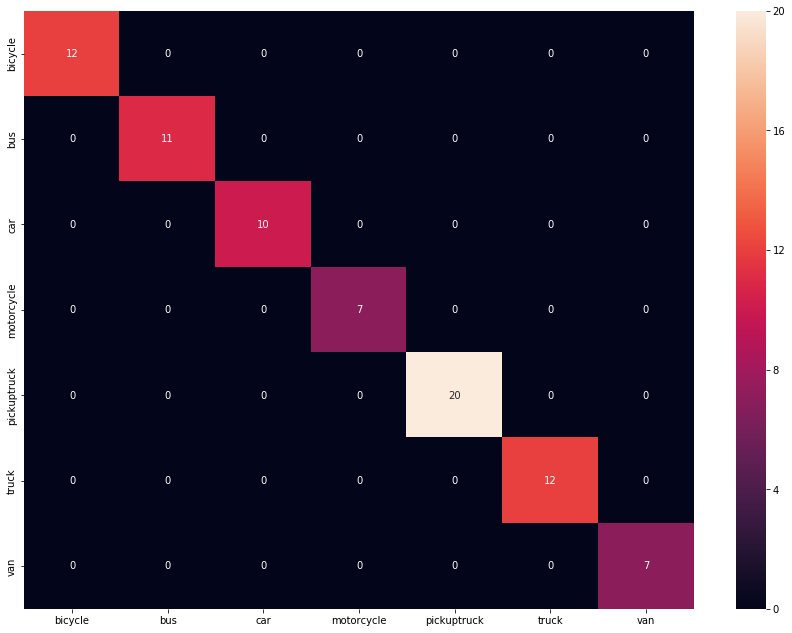

In [10]:
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
utils.plotConfusionMatrix(confusion_matrix, labels_map)

In [11]:
metrics = utils.getMetricsDataframe(accuracy, precision, recall, f1_score, labels_map)
display(metrics)

,Accuracy,Precision,Recall,F1-Score
bicycle,100.00%,100.00%,100.00%,100.00%
bus,100.00%,100.00%,100.00%,100.00%
car,100.00%,100.00%,100.00%,100.00%
motorcycle,100.00%,100.00%,100.00%,100.00%
pickuptruck,100.00%,100.00%,100.00%,100.00%
truck,100.00%,100.00%,100.00%,100.00%
van,100.00%,100.00%,100.00%,100.00%
Average,100.00%,100.00%,100.00%,100.00%
